In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import variable

import torchvision
from torchvision import transforms


In [340]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [341]:
train = pd.read_csv("csv_data/fashion_train.csv")
test = pd.read_csv("csv_data/fashion_test.csv")

In [342]:
# test.columns

In [343]:
# from itertools import count
# c = count(785)

In [344]:
# test.columns.str.replace("V","t")
# test.columns = ["V"+ str(next(c)) for x in test.columns]
# test.columns

In [345]:
mnist_df = pd.concat([train,test],axis=0, ignore_index=True)
mnist_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1996,0,0,0,0,0,0,0,36,99,79,...,72,82,60,9,126,102,85,95,42,2
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [346]:
train = mnist_df.loc[mnist_df.index <= 1600]
test = mnist_df.loc[mnist_df.index > 1600]
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0,0,0,0,0,0,0,0,0,18,...,178,169,149,24,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,34,142,...,56,0,0,0,0,0,0,0,0,1
1598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [347]:
mnist_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1996,0,0,0,0,0,0,0,36,99,79,...,72,82,60,9,126,102,85,95,42,2
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [348]:
len(mnist_df)

2000

In [349]:
images = []
labels = []
for i in list(mnist_df.values):
    labels.append(i[-1])
    images.append(i[:-1])
    
len(images), np.asarray(images).shape, np.asarray(labels).shape

(2000, (2000, 784), (2000,))

In [350]:
class FashionMnist(Dataset):
    def __init__(self,data,transform=None):
#         super().__init__()
        self.fashion_mnist = list(data.values)
        self.transform = transform
        
        images = []
        labels = []
        for i in self.fashion_mnist:
            images.append(i[:-1])
            labels.append(i[-1])
            
        self.labels = np.asarray(labels)
        self.images = np.asarray(images).reshape(-1,28,28,1).astype("float32")
#         for image in images:
#             np.asarray(image.reshape(-1,28,28,1).astype("float32"))
        
    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform:           
            image = self.transform(image)
            
        return image, label
        
    def __len__(self):
        return len(self.images)
                        

In [351]:
transformer = transforms.Compose([transforms.ToTensor()])

In [352]:
train_data = FashionMnist(train,transformer)
test_data = FashionMnist(test,transformer)

In [353]:
train_loader = DataLoader(train_data,batch_size=100)
test_loader = DataLoader(test_data, batch_size=100)
for (image, label) in test_loader:
    print(image.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([99, 1, 28, 28])


In [354]:
next(iter(train_loader))[0].shape

torch.Size([100, 1, 28, 28])

In [355]:
##with added train arguement
class FashionMnist(Dataset):
    def __init__(self,data,transform=None,train=True):
#         super().__init__()
        
        self.transform = transform
        
        filt = 0.7*len(data)       
        if train:            
            data = data.loc[data.index < filt]
        else:
            data = data.loc[data.index >= filt]
                        
        self.fashion_mnist = list(data.values)    
        
        images = []
        labels = []
        for i in self.fashion_mnist:
            images.append(i[:-1])
            labels.append(i[-1])
            
        self.labels = np.asarray(labels)
        self.images = np.asarray(images).reshape(-1,28,28,1).astype("float32")
#         for image in images:
#             np.asarray(image.reshape(-1,28,28,1).astype("float32"))
        
    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform:           
            image = self.transform(image)
            
        return image, label
        
    def __len__(self):
        return len(self.images)                        

In [356]:
train_data_ = FashionMnist(mnist_df, transform=transformer, train=True)
test_data_ = FashionMnist(mnist_df, transform=transformer, train=False)
len(train_data_),len(test_data_)

(1400, 600)

In [357]:
###now with torchvision
train_set = torchvision.datasets.FashionMNIST("./data",download=True,train=True,transform=transformer)
test_set = torchvision.datasets.FashionMNIST("./data",download=True,train=False,transform=transformer)
train_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [358]:
train_set_loader = DataLoader(train_set, batch_size=100 )
test_set_loader = DataLoader(test_set, batch_size=100 )

In [359]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [360]:
def make_label(label):
    mapping = {
        0: "T-shirt/top",
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }
    
    label = (label.item() if type(label) == torch.Tensor else label)
    return mapping[label]

In [361]:
img, label = next(iter(train_set))  
img.shape,label

(torch.Size([1, 28, 28]), 9)

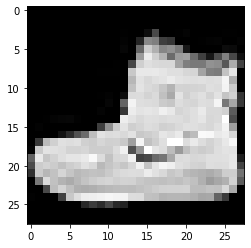

In [362]:
plt.imshow(img.squeeze(), cmap="gray")

In [363]:
batch= next(iter(train_loader))
images, labels = batch
images.shape


torch.Size([100, 1, 28, 28])

In [364]:
# practice
from itertools import count
counter = count(10, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10-Shirt,20-Ankle boot,30-Ankle boot,40-Coat,50-Trouser,60-Shirt,70-Sneaker,80-Sandal,90-Ankle boot,100-Sneaker,110-Bag,120-T-shirt/top,130-Dress,140-Sandal,150-Pullover,160-Shirt,170-Sandal,180-Bag,190-Pullover,200-Ankle boot,210-Sandal,220-T-shirt/top,230-Coat,240-Pullover,250-Dress,260-Bag,270-Trouser,280-Ankle boot,290-Dress,300-T-shirt/top,310-T-shirt/top,320-Sneaker,330-Coat,340-Sandal,350-Coat,360-Pullover,370-Bag,380-Coat,390-Sandal,400-Bag,410-Ankle boot,420-T-shirt/top,430-Ankle boot,440-Bag,450-Sandal,460-Coat,470-Bag,480-Bag,490-Sandal,500-Dress,510-Shirt,520-Ankle boot,530-Ankle boot,540-Bag,550-Dress,560-Shirt,570-Sandal,580-Bag,590-Coat,600-Pullover,610-Sandal,620-T-shirt/top,630-T-shirt/top,640-Trouser,650-Shirt,660-Sandal,670-Trouser,680-Sandal,690-Shirt,700-Shirt,710-Ankle boot,720-Sandal,730-Trouser,740-T-shirt/top,750-Ankle boot,760-Bag,770-Dress,780-Dress,790-Dress,800-Sneaker,810-Sneaker,820-Dress,830-Trouser,840-Coat,850-Trouser,860-Bag,870-Pullover,880-Coat,890-

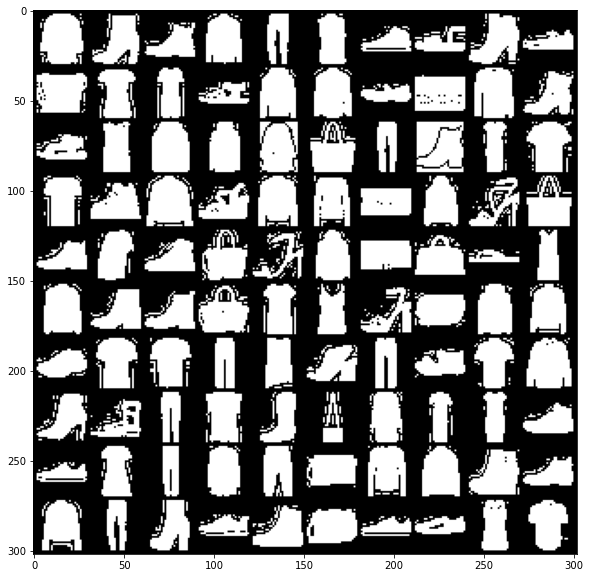

In [365]:
grid = torchvision.utils.make_grid(images, nrow=10 )
plt.figure(figsize=(15,10))
plt.imshow(np.transpose(grid,(1,2,0)))
for i, label in zip(counter,labels):
    print(f"{i}-{make_label(label)}",end=",")

In [366]:
class FashionCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=32, kernel_size=3,padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=64, kernel_size=3),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6,out_features=600)
        self.drop = nn.Dropout(p=0.25)
        self.fc2 = nn.Linear(in_features=600,out_features=120)
        self.fc3 = nn.Linear(in_features=120,out_features=10)
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1) ##like nn.Flatten()
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

In [367]:
model = FashionCNN()
model.to(device)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)

In [368]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

In [369]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [370]:
images, labels = next(iter(train_loader))
images.shape, labels.size()
image = images[0]
image.shape,label, make_label(label)

(torch.Size([1, 28, 28]), tensor(6), 'Shirt')

In [371]:
##random prediction without training
model.eval()
with torch.inference_mode():
    y_pred = model(image.unsqueeze(dim=0).to(device))
    y_pred_prob = torch.softmax(y_pred, dim=1)
    y_pred_label = torch.argmax(y_pred_prob, dim=1)
y_pred_label, make_label(y_pred_label)

(tensor([5], device='cuda:0'), 'Sandal')

Text(0.5, 1.0, 'data: Shirt predcition: Sandal')

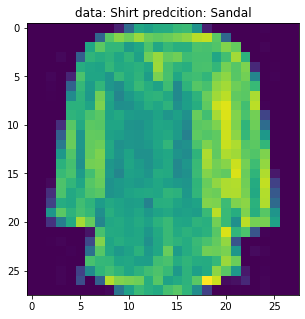

In [372]:
plt.figure(figsize=(7,5))
plt.imshow(image.squeeze())
plt.title(f"data: {make_label(label)} predcition: {make_label(y_pred_label)}")

In [373]:
epochs = 15

In [374]:
from torchmetrics import Accuracy

model.train()
train_loss,train_acc = 0, 0

for epoch in range(epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        y_pred = model(images)
        y_pred_prob = torch.softmax(y_pred, dim=1)
        y_pred_label = torch.argmax(y_pred_prob, dim=1)
        
        loss = loss_fn(y_pred, labels)
        train_loss += loss.item()
        
        accuracy = Accuracy(task="multiclass", num_classes=10).to(device)
        acc = accuracy(y_pred_label, labels)
        train_acc += acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    
    model.eval()
    test_loss = 0
    test_acc = 0
    with torch.inference_mode():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            
            test_pred = model(X)
            test_pred_prob = torch.softmax(test_pred, dim=1)
            test_pred_label = torch.argmax(test_pred_prob, dim=1)
            
            loss = loss_fn(test_pred, y)
            test_loss += loss
            
            
            accuracy = Accuracy(task="multiclass", num_classes=10).to(device)
            
            acc = accuracy(test_pred_label, y)
            test_acc += acc
        
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
        
    print(f"epoch: {epoch}, train_loss: {train_loss:0.2f}, train_acc: {train_acc:0.2f}, test loss: {test_loss:0.2f}, test acc: {test_acc:0.2f}")

epoch: 0, train_loss: 1.39, train_acc: 0.56, test loss: 0.92, test acc: 0.71
epoch: 1, train_loss: 0.68, train_acc: 0.81, test loss: 0.67, test acc: 0.76
epoch: 2, train_loss: 0.52, train_acc: 0.88, test loss: 0.52, test acc: 0.81
epoch: 3, train_loss: 0.39, train_acc: 0.93, test loss: 0.51, test acc: 0.82
epoch: 4, train_loss: 0.32, train_acc: 0.95, test loss: 0.48, test acc: 0.82
epoch: 5, train_loss: 0.26, train_acc: 0.97, test loss: 0.51, test acc: 0.80
epoch: 6, train_loss: 0.25, train_acc: 0.98, test loss: 0.64, test acc: 0.81
epoch: 7, train_loss: 0.19, train_acc: 1.00, test loss: 0.62, test acc: 0.83
epoch: 8, train_loss: 0.16, train_acc: 1.01, test loss: 0.75, test acc: 0.80
epoch: 9, train_loss: 0.16, train_acc: 1.01, test loss: 0.73, test acc: 0.81
epoch: 10, train_loss: 0.19, train_acc: 1.00, test loss: 0.92, test acc: 0.76
epoch: 11, train_loss: 0.21, train_acc: 0.99, test loss: 0.87, test acc: 0.78
epoch: 12, train_loss: 0.23, train_acc: 0.99, test loss: 0.55, test acc: 0

In [375]:
len(test_loader)

4

In [376]:
test_img_batches = []
test_label_batches = []
for batch, (img,label) in enumerate(test_loader):
    test_img_batches.append(img)
    test_label_batches.append(label)
    
len(test_img_batches), len(test_label_batches)   

(4, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


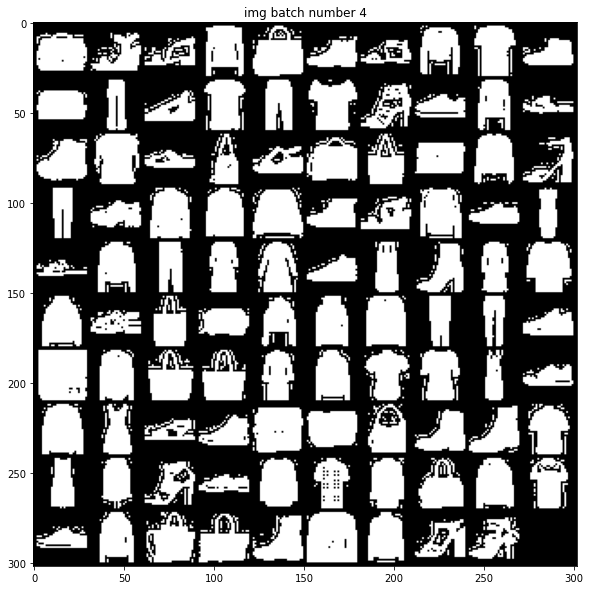

In [377]:
import random
random_idx = random.randint(0, len(test_img_batches)-1)

plt.figure(figsize=(15,10))
grid = torchvision.utils.make_grid(test_img_batches[random_idx], nrow=10)
plt.imshow(torch.permute(grid,(1,2,0)))
plt.title(f"img batch number {random_idx+1}");

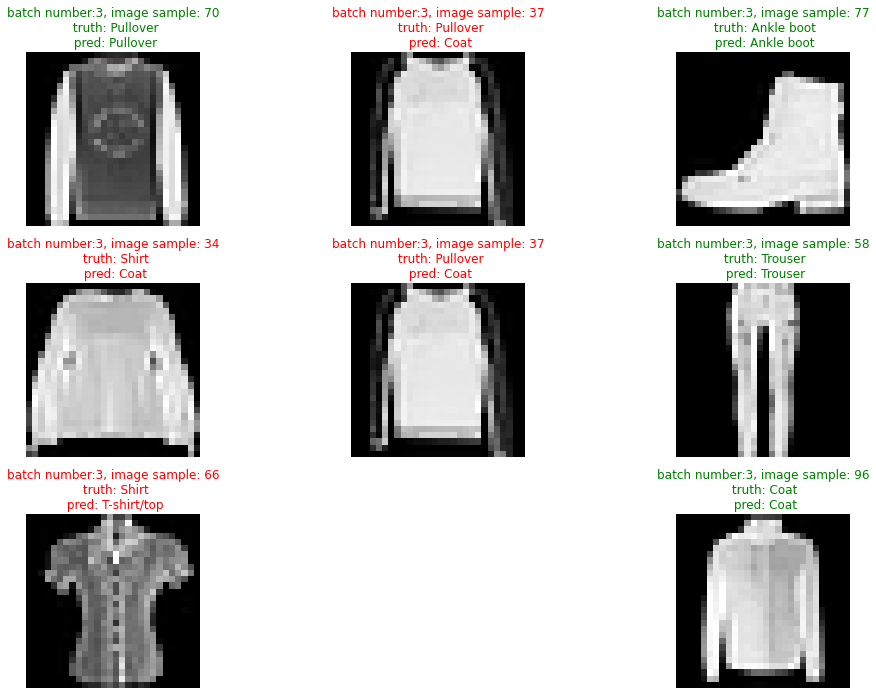

In [409]:
##predict a random number of images from test data

plt.figure(figsize=(15,10))
for i in range(9):
    random_image = random.randint(0,len(test_img_batches[random_idx]-1))
    sample_img = test_img_batches[random_idx][random_image]
    sample_label = test_label_batches[random_idx][random_image]

    model.eval()
    with torch.inference_mode():
        y_pred = model(sample_img.unsqueeze(dim=0).to(device))
        y_pred_prob = torch.softmax(y_pred, dim=1)
        y_pred_label = torch.argmax(y_pred_prob, dim=1)
    
    plt.subplot(3,3,i+1)
    plt.imshow(sample_img.permute(1,2,0), cmap="gray")
    
    if make_label(sample_label) == make_label(y_pred_label):
        plt.title(f"batch number:{random_idx}, image sample: {random_image}\n truth: {make_label(sample_label)}\n pred: {make_label(y_pred_label)}",c="g")
    else:
        plt.title(f"batch number:{random_idx}, image sample: {random_image}\n truth: {make_label(sample_label)}\n pred: {make_label(y_pred_label)}",c="r")
                                              
    plt.tight_layout()
    plt.axis(False)

In [436]:
test_truth = [y for X, y in test_loader]
test_truth = torch.cat(test_truth)
len(test_truth)

399

In [440]:
model.eval()
with torch.inference_mode():
    pred_labels = []
    for X, y in test_loader:
        X,y = X.to(device), y.to(device)
        y_pred = model(X)
        y_pred_prob = torch.softmax(y_pred, dim=1)
        y_pred_label = torch.argmax(y_pred_prob, dim=1)
        
        pred_labels.append(y_pred_label.cpu())
y_pred_tensor = torch.cat(pred_labels)
pred_labels, y_pred_tensor

([tensor([4, 2, 4, 8, 0, 1, 8, 9, 5, 1, 2, 8, 5, 1, 2, 1, 9, 0, 2, 0, 1, 2, 6, 2,
          0, 4, 5, 0, 4, 9, 1, 4, 7, 2, 9, 4, 0, 1, 9, 4, 3, 1, 7, 0, 3, 8, 8, 3,
          8, 9, 7, 0, 7, 8, 7, 7, 4, 9, 7, 3, 2, 2, 1, 2, 7, 9, 1, 7, 2, 4, 7, 5,
          0, 0, 1, 8, 8, 2, 8, 9, 5, 8, 8, 1, 5, 2, 0, 8, 8, 4, 2, 6, 3, 5, 4, 4,
          8, 7, 2, 6]),
  tensor([9, 8, 0, 1, 9, 9, 6, 1, 2, 4, 1, 9, 2, 1, 3, 7, 5, 0, 8, 6, 7, 0, 4, 0,
          0, 9, 9, 5, 2, 4, 5, 4, 0, 8, 2, 4, 9, 4, 9, 2, 6, 4, 4, 3, 4, 1, 1, 5,
          8, 3, 8, 2, 7, 0, 9, 8, 4, 0, 0, 2, 6, 2, 5, 3, 8, 2, 3, 4, 9, 2, 3, 9,
          9, 9, 3, 2, 3, 9, 4, 2, 7, 4, 3, 5, 1, 0, 6, 5, 7, 6, 7, 2, 9, 7, 0, 8,
          7, 0, 3, 3]),
  tensor([1, 9, 0, 7, 7, 9, 3, 4, 2, 9, 3, 9, 1, 4, 2, 2, 4, 4, 7, 4, 5, 1, 4, 8,
          7, 9, 3, 7, 0, 1, 9, 8, 4, 4, 8, 6, 2, 3, 4, 2, 9, 1, 0, 5, 3, 4, 3, 5,
          8, 9, 4, 0, 0, 7, 9, 4, 1, 8, 5, 5, 7, 4, 7, 1, 0, 9, 4, 7, 3, 4, 0, 1,
          0, 8, 3, 5, 7, 7, 7, 0, 1, 9, 6, 4, 5, 9

In [443]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

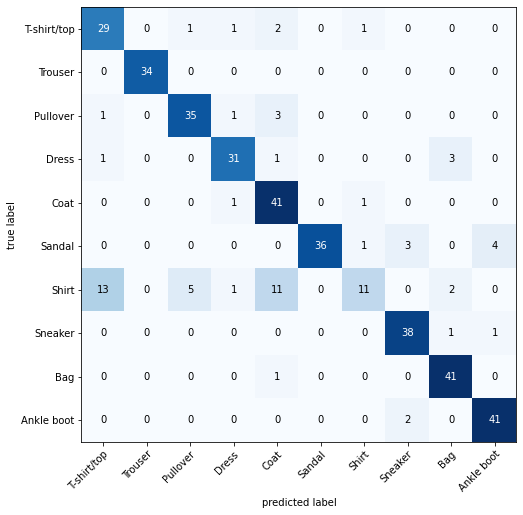

In [444]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=10, task="multiclass")
confmat_tensor = confmat(y_pred_tensor,
                        test_truth)

plot_confusion_matrix(confmat_tensor.numpy(),
                     class_names=train_set.classes,
                     figsize=(15,8))